In [ ]:
# Download the data set about Value of Energy Cost Saving Program for businesses in New York City (under the "Export" option, there is a way to retrieve a CSV file). 

### Answer the following questions:
# How many different companies are represented in the data set?
# What is the total number of jobs created for businesses in Queens?
# How many different unique email domains names are there in the data set?
# Considering only NTAs with at least 5 listed businesses, what is the average total savings and the total jobs created for each NTA?
# Save your result for the previous question as a CSV file.

In [107]:
import numpy as np
import pandas as pd
data = pd.read_csv('Value_of_Energy_Cost_Savings_Program_Savings_for_Businesses_-_FY2020.csv', low_memory=False,   na_values=['nan'])
print('The size of data is: ', data.shape)

The size of data is:  (450, 26)


In [91]:
pd.set_option('display.max_columns', 26)  ## to show all the columns of the data

In [92]:
# How many different companies are represented in the data set?
len(data['Company Name'].unique())

439

In [93]:
# What is the total number of jobs created for businesses in Queens?
data['City'].value_counts()['Queens']

67

In [94]:
# How many different unique email domains names are there in the data set?
data['company email'].nunique()

420

In [226]:
# Considering only NTAs with at least 5 listed businesses,
nta_groups = data.groupby('NTA').agg({'Job created':'sum','Total Savings':'mean','Company Name':'count'})
nta_group_filter = nta_groups[nta_groups['Company Name'] >= 5]
nta_group_filter
#  what is the average total savings and the total jobs created for each NTA?
print('The average total saving is: ', nta_group_filter['Total Savings'].mean())
print('The average total job created is: ' ,nta_group_filter['Job created'].mean())

The average total saving is:  46040.3278054773
The average total job created is:  3.95


In [ ]:
## Day 5
# Using the same data set and results that you were working with in the pandas action items section (Day 4), 
# create a scatter plot of jobs created versus average savings. Use both a standard and a logarithmic scale for the average savings.
# histogram of the log of the average total savings.
# line plot of the total jobs created for each month.

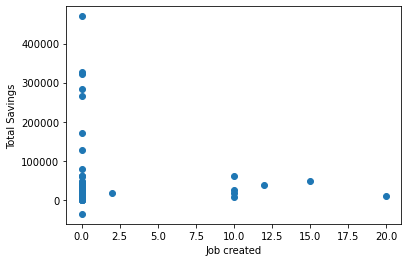

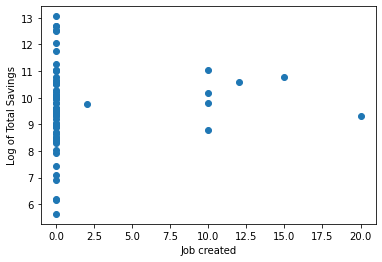

In [201]:
## Day 5
#  Using the same data set and results that you were working with in the pandas action items section (Day 4), 
#  create a scatter plot of jobs created versus average savings.Use both a standard and a logarithmic scale for the average savings.
import matplotlib.pyplot as plt
plt.scatter(nta_groups['Job created'], nta_groups['Total Savings'])
plt.xlabel("Job created")
plt.ylabel("Total Savings")
plt.show()

plt.scatter(nta_groups['Job created'], np.log(nta_groups['Total Savings']));
plt.xlabel("Job created")
plt.ylabel("Log of Total Savings")
plt.show()

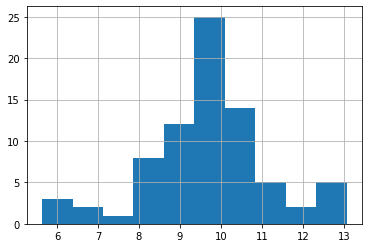

In [183]:
## Day 5
# histogram of the log of the average total savings.
np.log(nta_groups['Total Savings']).hist();

<AxesSubplot:xlabel='date'>

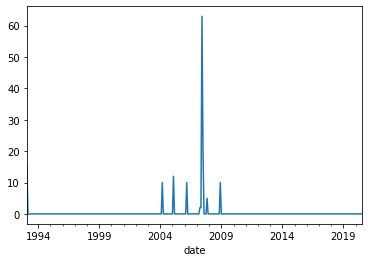

In [224]:
# line plot of the total jobs created for each month.
data["date"] = pd.to_datetime(data["Effective Date"])
data.sort_values(by="date").set_index('date').resample('M')['Job created'].sum().plot()